In [ ]:
# =============================================================================
# COMPLETE DREAMBOOTH BOOK COVER TRAINING - GOOGLE COLAB
# =============================================================================

# Check GPU
import torch
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

GPU Available: True
GPU Name: Tesla T4


In [ ]:
# =============================================================================
# STEP 1: Installation and Setup
# =============================================================================


Found existing installation: diffusers 0.30.2
Uninstalling diffusers-0.30.2:
  Successfully uninstalled diffusers-0.30.2
Found existing installation: transformers 4.44.2
Uninstalling transformers-4.44.2:
  Successfully uninstalled transformers-4.44.2
Found existing installation: accelerate 0.33.0
Uninstalling accelerate-0.33.0:
  Successfully uninstalled accelerate-0.33.0
Found existing installation: huggingface-hub 0.24.5
Uninstalling huggingface-hub-0.24.5:
  Successfully uninstalled huggingface-hub-0.24.5
Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: sentence-transformers 3.0.1
Uninstalling sentence

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.8/485.8 kB 41.9 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
# Remove problematic packages
!pip uninstall -y diffusers transformers accelerate huggingface_hub torch torchvision torchaudio sentence-transformers xformers bitsandbytes safetensors

# Install PyTorch + matching xformers for CUDA 12.4
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install xformers --index-url https://download.pytorch.org/whl/cu124

# Install Hugging Face stack
!pip install diffusers==0.30.0 transformers==4.42.4 sentence-transformers==3.0.1 accelerate==0.33.0 huggingface_hub==0.24.5 bitsandbytes safetensors


Found existing installation: transformers 4.42.4
Uninstalling transformers-4.42.4:
  Successfully uninstalled transformers-4.42.4
Found existing installation: huggingface-hub 0.34.4
Uninstalling huggingface-hub-0.34.4:
  Successfully uninstalled huggingface-hub-0.34.4
Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: safetensors 0.6.2
Uninstalling safetensors-0.6.2:
  Successfully uninstalled safetensors-0.6.2
Looking in indexes: https://download.pytorch.org/whl/cu124
  Using cached https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl.metadata (28 kB)
  Using cached https

Looking in indexes: https://download.pytorch.org/whl/cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 20.6 MB/s eta 0:00:00
  Using cached diffusers-0.30.0-py3-none-any.whl.metadata (18 kB)
  Using cached transformers-4.42.4-py3-none-any.whl.metadata (43 kB)
  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Using cached accelerate-0.33.0-py3-none-any.whl.metadata (18 kB)
  Using cached bitsandbytes-0.47.0-py3-none-manylinux_2_24_x86_64.whl.metadata (11 kB)
  Using cached safetensors-0.6.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached diffusers-0.30.0-py3-none-any.whl (2.6 MB)
Using cached transformers-4.42.4-py3-none-any.whl (9.3 MB)
Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import torch
import diffusers
import transformers
import xformers

print(torch.__version__)
print(diffusers.__version__)
print(transformers.__version__)
print(xformers.__version__)


2.6.0+cu124
0.30.0
4.42.4
0.0.29.post3


In [ ]:
!pip install --upgrade huggingface_hub


  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.34.4-py3-none-any.whl (561 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.5
    Uninstalling huggingface-hub-0.24.5:
      Successfully uninstalled huggingface-hub-0.24.5


In [ ]:
!pip install --upgrade transformers==4.44.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [1]:
# Import libraries
import os
import json
import math
import random
import shutil
from pathlib import Path
from typing import Optional

import torch
import torch.nn.functional as F
import torch.utils.checkpoint
from torch.utils.data import Dataset, DataLoader

import PIL
from PIL import Image
import numpy as np
from tqdm.auto import tqdm

from diffusers import (
    StableDiffusionPipeline,
    DDPMScheduler,
    UNet2DConditionModel,
    AutoencoderKL,
)
from diffusers.optimization import get_scheduler
from transformers import CLIPTextModel, CLIPTokenizer
import zipfile

In [2]:
# =============================================================================
# STEP 2: Upload and Extract Dataset
# =============================================================================

from google.colab import files

print("Please upload your lora_dataset.zip file:")
uploaded = files.upload()

# Extract dataset
with zipfile.ZipFile('lora_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("\nDataset extracted successfully!")

# Check structure
print("Dataset structure:")
for root, dirs, files in os.walk('/content/dataset'):
    level = root.replace('/content/dataset', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:
        print(f'{subindent}{file}')
    if len(files) > 3:
        print(f'{subindent}... and {len(files)-3} more files')

Please upload your lora_dataset.zip file:


Saving lora_dataset.zip to lora_dataset.zip

Dataset extracted successfully!
Dataset structure:
dataset/
  lora_dataset/
    images/
      0202.jpg
      0119.jpg
      0143.jpg
      ... and 178 more files
    captions/
      0067.txt
      0143.txt
      0028.txt
      ... and 178 more files


In [3]:
# =============================================================================
# STEP 3: Configuration
# =============================================================================

class DreamBoothConfig:
    # Model settings
    pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"
    revision = None

    # Training data
    instance_data_dir = "/content/instance_images"
    class_data_dir = "/content/class_images"

    # Prompts
    instance_prompt = "a sks book cover"  # sks is the unique identifier
    class_prompt = "a book cover"

    # Training parameters
    resolution = 512
    train_batch_size = 1
    gradient_accumulation_steps = 1
    learning_rate = 5e-6
    lr_scheduler = "constant"
    lr_warmup_steps = 0
    max_train_steps = 800

    # Regularization
    with_prior_preservation = True
    prior_loss_weight = 1.0
    num_class_images = 50  # Number of regularization images to generate

    # Memory optimization
    gradient_checkpointing = True
    mixed_precision = "fp16"
    use_8bit_adam = True

    # Output
    output_dir = "/content/dreambooth_model"
    seed = 42

config = DreamBoothConfig()

In [4]:
# =============================================================================
# STEP 4: Data Preparation
# =============================================================================

def prepare_instance_images():
    """Prepare instance images from your dataset"""

    os.makedirs(config.instance_data_dir, exist_ok=True)

    captions_dir = '/content/dataset/lora_dataset/captions'
    images_dir = '/content/dataset/lora_dataset/images'

    if not os.path.exists(captions_dir) or not os.path.exists(images_dir):
        print("Error: Expected 'captions' and 'images' folders not found in dataset")
        return 0

    caption_files = sorted([f for f in os.listdir(captions_dir) if f.endswith('.txt')])
    processed_count = 0

    print(f"Processing {len(caption_files)} caption files...")

    for i, caption_file in enumerate(caption_files):
        file_id = caption_file.split('.')[0]

        # Find corresponding image
        image_path = None
        for ext in ['.jpg', '.jpeg', '.png', '.webp', '.bmp']:
            potential_path = os.path.join(images_dir, f"{file_id}{ext}")
            if os.path.exists(potential_path):
                image_path = potential_path
                break

        if image_path:
            try:
                # Load and resize image
                image = Image.open(image_path)
                if image.mode != 'RGB':
                    image = image.convert('RGB')

                # Resize to training resolution
                image = image.resize((config.resolution, config.resolution), Image.LANCZOS)

                # Save processed image
                output_path = os.path.join(config.instance_data_dir, f"instance_{i:03d}.jpg")
                image.save(output_path, "JPEG", quality=95)
                processed_count += 1

            except Exception as e:
                print(f"Error processing {image_path}: {e}")
        else:
            print(f"No image found for {file_id}")

    print(f"Successfully processed {processed_count} instance images")
    return processed_count

def generate_class_images():
    """Generate regularization images"""

    if not config.with_prior_preservation:
        return

    os.makedirs(config.class_data_dir, exist_ok=True)

    # Check if we already have enough class images
    existing_images = len([f for f in os.listdir(config.class_data_dir) if f.endswith(('.jpg', '.png'))])
    if existing_images >= config.num_class_images:
        print(f"Already have {existing_images} class images, skipping generation")
        return

    print(f"Generating {config.num_class_images} class images...")

    # Load base model to generate class images
    pipeline = StableDiffusionPipeline.from_pretrained(
        config.pretrained_model_name_or_path,
        torch_dtype=torch.float16,
        safety_checker=None,
        requires_safety_checker=False
    ).to("cuda")

    pipeline.set_progress_bar_config(disable=True)

    # Generate images
    for i in range(config.num_class_images):
        image = pipeline(
            config.class_prompt,
            num_inference_steps=50,
            guidance_scale=6.0,
            height=config.resolution,
            width=config.resolution
        ).images[0]

        image.save(os.path.join(config.class_data_dir, f"class_{i:03d}.jpg"))

        if (i + 1) % 10 == 0:
            print(f"Generated {i + 1}/{config.num_class_images} class images")

    # Clean up
    del pipeline
    torch.cuda.empty_cache()
    print("Class image generation completed")

# Prepare data
print("Preparing instance images...")
num_instances = prepare_instance_images()

if num_instances == 0:
    print("No images processed. Please check your dataset structure.")
    exit()

print("Generating class images...")
generate_class_images()

Preparing instance images...
Processing 181 caption files...
Successfully processed 181 instance images
Generating class images...
Generating 50 class images...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generated 10/50 class images
Generated 20/50 class images
Generated 30/50 class images
Generated 40/50 class images
Generated 50/50 class images
Class image generation completed


In [5]:
# =============================================================================
# STEP 5: Dataset Class
# =============================================================================
from torchvision import transforms
class DreamBoothDataset(Dataset):
    def __init__(
        self,
        instance_data_root,
        instance_prompt,
        tokenizer,
        class_data_root=None,
        class_prompt=None,
        size=512,
    ):
        self.size = size
        self.tokenizer = tokenizer

        self.instance_data_root = Path(instance_data_root)
        self.instance_prompt = instance_prompt
        self.instance_images_path = list(Path(instance_data_root).iterdir())
        self.num_instance_images = len(self.instance_images_path)

        self.class_data_root = None
        if class_data_root is not None:
            self.class_data_root = Path(class_data_root)
            self.class_images_path = list(Path(class_data_root).iterdir())
            self.num_class_images = len(self.class_images_path)
        else:
            self.class_images_path = []
            self.num_class_images = 0

        self.class_prompt = class_prompt
        self._length = max(self.num_instance_images, self.num_class_images)



        self.image_transforms = transforms.Compose([
            transforms.Lambda(lambda x: x / 127.5 - 1.0)  # Normalize to [-1, 1]
        ])


    def __len__(self):
        return self._length

    def __getitem__(self, index):
        example = {}

        # Instance image
        instance_image_path = self.instance_images_path[index % self.num_instance_images]
        instance_image = Image.open(instance_image_path)
        if not instance_image.mode == "RGB":
            instance_image = instance_image.convert("RGB")

        instance_image = instance_image.resize((self.size, self.size), resample=PIL.Image.LANCZOS)
        instance_image = torch.tensor(np.array(instance_image)).permute(2, 0, 1)
        example["instance_images"] = self.image_transforms(instance_image)

        # Instance prompt
        example["instance_prompt_ids"] = self.tokenizer(
            self.instance_prompt,
            padding="do_not_pad",
            truncation=True,
            max_length=self.tokenizer.model_max_length,
        ).input_ids

        # Class image and prompt
        if self.class_data_root:
            class_image_path = self.class_images_path[index % self.num_class_images]
            class_image = Image.open(class_image_path)
            if not class_image.mode == "RGB":
                class_image = class_image.convert("RGB")

            class_image = class_image.resize((self.size, self.size), resample=PIL.Image.LANCZOS)
            class_image = torch.tensor(np.array(class_image)).permute(2, 0, 1)
            example["class_images"] = self.image_transforms(class_image)

            example["class_prompt_ids"] = self.tokenizer(
                self.class_prompt,
                padding="do_not_pad",
                truncation=True,
                max_length=self.tokenizer.model_max_length,
            ).input_ids

        return example

def collate_fn(examples):
    input_ids = [example["instance_prompt_ids"] for example in examples]
    pixel_values = [example["instance_images"] for example in examples]

    # Concat class and instance examples for prior preservation
    if config.with_prior_preservation:
        input_ids += [example["class_prompt_ids"] for example in examples]
        pixel_values += [example["class_images"] for example in examples]

    pixel_values = torch.stack(pixel_values)
    pixel_values = pixel_values.to(memory_format=torch.contiguous_format).float()

    input_ids = tokenizer.pad(
        {"input_ids": input_ids},
        padding=True,
        return_tensors="pt",
    ).input_ids

    batch = {
        "input_ids": input_ids,
        "pixel_values": pixel_values,
    }

    return batch

In [7]:
# =============================================================================
# STEP 6: Model Setup
# =============================================================================

print("Loading models...")

# Load tokenizer
tokenizer = CLIPTokenizer.from_pretrained(
    config.pretrained_model_name_or_path,
    subfolder="tokenizer",
    revision=config.revision,
)

# Load text encoder
text_encoder = CLIPTextModel.from_pretrained(
    config.pretrained_model_name_or_path,
    subfolder="text_encoder",
    revision=config.revision,
)

# Load VAE
vae = AutoencoderKL.from_pretrained(
    config.pretrained_model_name_or_path,
    subfolder="vae",
    revision=config.revision,
)

# Load UNet
unet = UNet2DConditionModel.from_pretrained(
    config.pretrained_model_name_or_path,
    subfolder="unet",
    revision=config.revision,
)

# Load noise scheduler
noise_scheduler = DDPMScheduler.from_pretrained(
    config.pretrained_model_name_or_path,
    subfolder="scheduler"
)

# Enable memory efficient attention
if hasattr(unet, "enable_xformers_memory_efficient_attention"):
    unet.enable_xformers_memory_efficient_attention()

# Move to GPU
device = torch.device("cuda")
vae.to(device)
text_encoder.to(device)
unet.to(device)

# Set requires_grad
vae.requires_grad_(False)
text_encoder.requires_grad_(False)

if config.gradient_checkpointing:
    unet.enable_gradient_checkpointing()

# Setup optimizer
if config.use_8bit_adam:
    try:
        import bitsandbytes as bnb
        optimizer_class = bnb.optim.AdamW8bit
    except ImportError:
        optimizer_class = torch.optim.AdamW
else:
    optimizer_class = torch.optim.AdamW

optimizer = optimizer_class(
    unet.parameters(),
    lr=config.learning_rate,
    betas=(0.9, 0.999),
    weight_decay=1e-2,
    eps=1e-08,
)

# Create dataset
train_dataset = DreamBoothDataset(
    instance_data_root=config.instance_data_dir,
    instance_prompt=config.instance_prompt,
    class_data_root=config.class_data_dir if config.with_prior_preservation else None,
    class_prompt=config.class_prompt,
    tokenizer=tokenizer,
    size=config.resolution,
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=config.train_batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=2,
)

# Setup scheduler
lr_scheduler = get_scheduler(
    config.lr_scheduler,
    optimizer=optimizer,
    num_warmup_steps=config.lr_warmup_steps * config.gradient_accumulation_steps,
    num_training_steps=config.max_train_steps * config.gradient_accumulation_steps,
)

print(f"Dataset size: {len(train_dataset)}")
print(f"Number of batches per epoch: {len(train_dataloader)}")

Loading models...


ModuleNotFoundError: Refer to https://github.com/facebookresearch/xformers for more information on how to install xformers

In [ ]:
# =============================================================================
# STEP 7: Training Loop
# =============================================================================

def train_dreambooth():
    """Main training function"""

    # Set seed
    torch.manual_seed(config.seed)

    unet.train()

    global_step = 0
    progress_bar = tqdm(
        range(config.max_train_steps),
        desc="Training",
        disable=False,
    )

    for epoch in range(math.ceil(config.max_train_steps / len(train_dataloader))):
        for step, batch in enumerate(train_dataloader):
            if global_step >= config.max_train_steps:
                break

            with torch.cuda.amp.autocast(enabled=config.mixed_precision == "fp16"):
                # Move batch to device
                pixel_values = batch["pixel_values"].to(device, dtype=torch.float32)
                input_ids = batch["input_ids"].to(device)

                # Encode images to latent space
                latents = vae.encode(pixel_values).latent_dist.sample()
                latents = latents * vae.config.scaling_factor

                # Sample noise
                noise = torch.randn_like(latents)
                bsz = latents.shape[0]

                # Sample timesteps
                timesteps = torch.randint(
                    0, noise_scheduler.config.num_train_timesteps,
                    (bsz,), device=device
                ).long()

                # Add noise to latents
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                # Get text embeddings
                encoder_hidden_states = text_encoder(input_ids)[0]

                # Predict noise residual
                model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample

                # Get target
                if noise_scheduler.config.prediction_type == "epsilon":
                    target = noise
                elif noise_scheduler.config.prediction_type == "v_prediction":
                    target = noise_scheduler.get_velocity(latents, noise, timesteps)
                else:
                    raise ValueError(f"Unknown prediction type {noise_scheduler.config.prediction_type}")

                if config.with_prior_preservation:
                    # Chunk the noise and model_pred into two parts and compute the loss on each part separately.
                    model_pred, model_pred_prior = torch.chunk(model_pred, 2, dim=0)
                    target, target_prior = torch.chunk(target, 2, dim=0)

                    # Compute instance loss
                    loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

                    # Compute prior loss
                    prior_loss = F.mse_loss(model_pred_prior.float(), target_prior.float(), reduction="mean")

                    # Add the prior loss to the instance loss.
                    loss = loss + config.prior_loss_weight * prior_loss
                else:
                    loss = F.mse_loss(model_pred.float(), target.float(), reduction="mean")

            # Backward pass
            loss.backward()

            if (global_step + 1) % config.gradient_accumulation_steps == 0:
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(unet.parameters(), 1.0)

                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()

            # Logging
            logs = {"loss": loss.detach().item(), "lr": lr_scheduler.get_last_lr()[0]}
            progress_bar.set_postfix(**logs)
            progress_bar.update(1)

            if global_step % 100 == 0:
                print(f"Step {global_step}: Loss = {loss.detach().item():.4f}")

            global_step += 1

    progress_bar.close()
    print("Training completed!")

# Start training
print("Starting DreamBooth training...")
train_dreambooth()

In [ ]:
# =============================================================================
# STEP 8: Save Model
# =============================================================================

print("Saving trained model...")

# Create output directory
os.makedirs(config.output_dir, exist_ok=True)

# Save UNet
unet.save_pretrained(os.path.join(config.output_dir, "unet"))

# Copy other components
tokenizer.save_pretrained(os.path.join(config.output_dir, "tokenizer"))
text_encoder.save_pretrained(os.path.join(config.output_dir, "text_encoder"))
vae.save_pretrained(os.path.join(config.output_dir, "vae"))
noise_scheduler.save_pretrained(os.path.join(config.output_dir, "scheduler"))

# Save training config
training_config = {
    "base_model": config.pretrained_model_name_or_path,
    "instance_prompt": config.instance_prompt,
    "class_prompt": config.class_prompt,
    "resolution": config.resolution,
    "max_train_steps": config.max_train_steps,
    "learning_rate": config.learning_rate,
    "num_instances": num_instances,
}

with open(os.path.join(config.output_dir, "training_config.json"), "w") as f:
    json.dump(training_config, f, indent=2)

print(f"Model saved to {config.output_dir}")

In [ ]:
from diffusers import StableDiffusionPipeline

# Create a pipeline from your trained parts
pipeline = StableDiffusionPipeline(
    vae=vae,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    unet=unet,
    scheduler=noise_scheduler,
    safety_checker=None,
    feature_extractor=None
)

# Save the complete pipeline
pipeline.save_pretrained(config.output_dir)


In [ ]:
# =============================================================================
# STEP 9: Test the Model (with Clean Text Overlay)
# =============================================================================
from IPython.display import display
from PIL import ImageDraw, ImageFont
import os

print("Loading trained model for testing...")

# Create pipeline with trained model
pipeline = StableDiffusionPipeline.from_pretrained(
    config.output_dir,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")

def add_caption_to_image(image, title, plot):
    """Add a clean title and plot text using PIL."""
    draw = ImageDraw.Draw(image)

    try:
        title_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", size=60)
        plot_font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", size=30)
    except:
        title_font = ImageFont.load_default()
        plot_font = ImageFont.load_default()

    W, H = image.size

    # Compute text sizes using textbbox
    title_bbox = draw.textbbox((0, 0), title, font=title_font)
    title_w, title_h = title_bbox[2] - title_bbox[0], title_bbox[3] - title_bbox[1]
    title_pos = ((W - title_w) / 2, 40)

    plot_bbox = draw.textbbox((0, 0), plot, font=plot_font)
    plot_w, plot_h = plot_bbox[2] - plot_bbox[0], plot_bbox[3] - plot_bbox[1]
    plot_pos = ((W - plot_w) / 2, H - plot_h - 50)

    # Draw outline for readability
    outline_range = 3
    for x in range(-outline_range, outline_range + 1):
        for y in range(-outline_range, outline_range + 1):
            draw.text((title_pos[0] + x, title_pos[1] + y), title, font=title_font, fill="black")
            draw.text((plot_pos[0] + x, plot_pos[1] + y), plot, font=plot_font, fill="black")

    # Draw main text
    draw.text(title_pos, title, font=title_font, fill="white")
    draw.text(plot_pos, plot, font=plot_font, fill="white")

    return image


def generate_book_cover(title, plot, num_inference_steps=50, guidance_scale=7.5):
    """Generate book cover without AI-generated text, then add clean text."""
    prompt = f"a sks book cover illustration of {plot}, highly detailed, digital art, no words, no title, no text"

    print(f"Generating: {prompt}")
    image = pipeline(
        prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        height=config.resolution,
        width=config.resolution
    ).images[0]

    # Add text overlay
    image = add_caption_to_image(image, title, plot)
    return image


# Test with examples
test_examples = [
    ("The Dragon's Quest", "An epic fantasy adventure through magical realms"),
    ("Cyber Dreams", "A futuristic sci-fi thriller about virtual reality"),
    ("Secret Garden", "A mysterious romance in an enchanted garden"),
    ("The Lost City", "Archaeological adventure in ancient ruins"),
    ("Digital Hearts", "A contemporary love story in the tech world")
]

print("\n" + "="*60)
print("TESTING THE TRAINED MODEL")
print("="*60)

for i, (title, plot) in enumerate(test_examples):
    print(f"\nTest {i+1}: Generating cover for '{title}'")
    try:
        image = generate_book_cover(title, plot)
        display(image)

        # Save image
        filename = f"dreambooth_test_{title.replace(' ', '_').lower()}.png"
        filepath = f"/content/{filename}"
        image.save(filepath)
        print(f"✅ Generated and saved as {filepath}")

    except Exception as e:
        print(f"❌ Error generating cover for '{title}': {e}")

Loading trained model for testing...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .



TESTING THE TRAINED MODEL

Test 1: Generating cover for 'The Dragon's Quest'
Generating: a sks book cover for The Dragon's Quest: An epic fantasy adventure through magical realms


  0%|          | 0/50 [00:00<?, ?it/s]

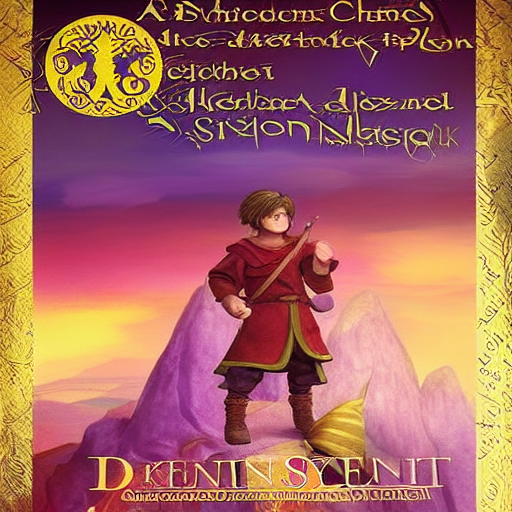

✅ Generated and saved as dreambooth_test_the_dragon's_quest.png

Test 2: Generating cover for 'Cyber Dreams'
Generating: a sks book cover for Cyber Dreams: A futuristic sci-fi thriller about virtual reality


  0%|          | 0/50 [00:00<?, ?it/s]

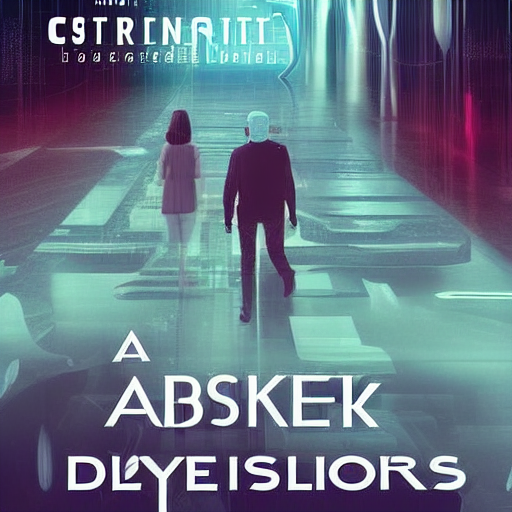

✅ Generated and saved as dreambooth_test_cyber_dreams.png

Test 3: Generating cover for 'Secret Garden'
Generating: a sks book cover for Secret Garden: A mysterious romance in an enchanted garden


  0%|          | 0/50 [00:00<?, ?it/s]

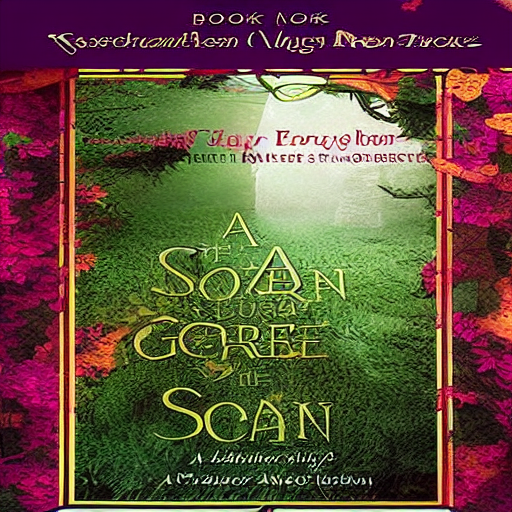

✅ Generated and saved as dreambooth_test_secret_garden.png

Test 4: Generating cover for 'The Lost City'
Generating: a sks book cover for The Lost City: Archaeological adventure in ancient ruins


  0%|          | 0/50 [00:00<?, ?it/s]

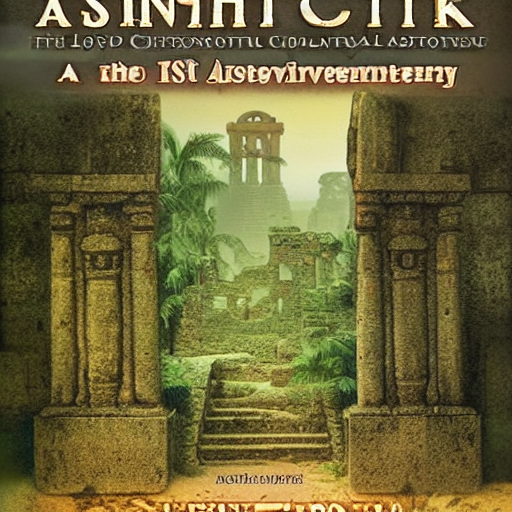

✅ Generated and saved as dreambooth_test_the_lost_city.png

Test 5: Generating cover for 'Digital Hearts'
Generating: a sks book cover for Digital Hearts: A contemporary love story in the tech world


  0%|          | 0/50 [00:00<?, ?it/s]

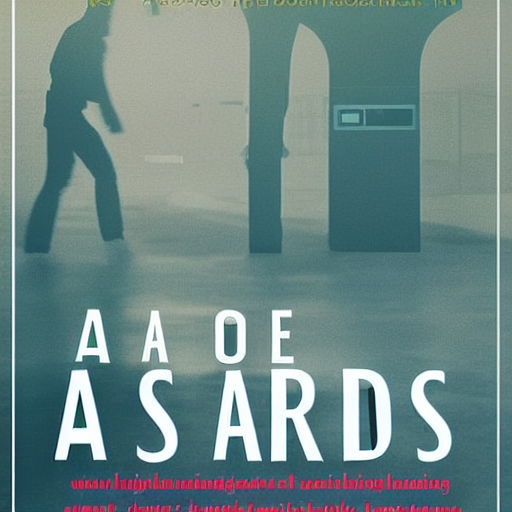

✅ Generated and saved as dreambooth_test_digital_hearts.png


In [ ]:
# =============================================================================
# STEP 9: Test the Model
# =============================================================================
from IPython.display import display

print("Loading trained model for testing...")

# Create pipeline with trained model
pipeline = StableDiffusionPipeline.from_pretrained(
    config.output_dir,
    torch_dtype=torch.float16,
    safety_checker=None
).to("cuda")


def generate_book_cover(title, plot, num_inference_steps=50, guidance_scale=7.5):
    """Generate book cover using trained model"""

    # Use the sks token in the prompt
    prompt = f"a sks book cover for {title}: {plot}"

    print(f"Generating: {prompt}")

    image = pipeline(
        prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        height=config.resolution,
        width=config.resolution
    ).images[0]

    return image

# Test with examples
test_examples = [
    ("The Dragon's Quest", "An epic fantasy adventure through magical realms"),
    ("Cyber Dreams", "A futuristic sci-fi thriller about virtual reality"),
    ("Secret Garden", "A mysterious romance in an enchanted garden"),
    ("The Lost City", "Archaeological adventure in ancient ruins"),
    ("Digital Hearts", "A contemporary love story in the tech world")
]

print("\n" + "="*60)
print("TESTING THE TRAINED MODEL")
print("="*60)

for i, (title, plot) in enumerate(test_examples):
    print(f"\nTest {i+1}: Generating cover for '{title}'")
    try:
        image = generate_book_cover(title, plot)


        display(image)


        # Save image
        filename = f"dreambooth_test_{title.replace(' ', '_').lower()}.png"
        image.save(f"/content/{filename}")
        print(f"✅ Generated and saved as {filename}")

    except Exception as e:
        print(f"❌ Error generating cover for '{title}': {e}")

In [ ]:
# =============================================================================
# STEP 10: Interactive Generation
# =============================================================================

def interactive_book_cover_generator():
    """Interactive interface for generating book covers"""

    print("\n" + "="*60)
    print("INTERACTIVE BOOK COVER GENERATOR")
    print("="*60)
    print("Your DreamBooth model is ready!")
    print("Enter book details to generate custom covers.")
    print("Type 'quit' to exit.\n")

    while True:
        try:
            print("-" * 40)
            title = input("📚 Book Title: ").strip()
            if title.lower() == 'quit':
                break

            plot = input("📖 Plot Summary: ").strip()
            if plot.lower() == 'quit':
                break

            if not title or not plot:
                print("⚠️  Please provide both title and plot!")
                continue

            print(f"\n🎨 Generating cover for '{title}'...")

            # Generate image
            image = generate_book_cover(title, plot)

            # Show and save
            image.show()
            safe_title = "".join(c for c in title if c.isalnum() or c in (' ', '-', '_')).rstrip()
            filename = f"custom_{safe_title.replace(' ', '_').lower()}.png"
            image.save(f"/content/{filename}")

            print(f"✅ Cover generated and saved as {filename}")
            print("📁 Check the Files panel to download your image!")

        except KeyboardInterrupt:
            break
        except Exception as e:
            print(f"❌ Error: {e}")

    print("\n👋 Thanks for using the Book Cover Generator!")

# Run interactive generator
interactive_book_cover_generator()


INTERACTIVE BOOK COVER GENERATOR
Your DreamBooth model is ready!
Enter book details to generate custom covers.
Type 'quit' to exit.

----------------------------------------
📚 Book Title: My girl
📖 Plot Summary: A mothers unwavering effort to save her daughter from demons

🎨 Generating cover for 'My girl'...
Generating: a sks book cover for My girl: A mothers unwavering effort to save her daughter from demons


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Cover generated and saved as custom_my_girl.png
📁 Check the Files panel to download your image!
----------------------------------------
📚 Book Title: exit
📖 Plot Summary: exit

🎨 Generating cover for 'exit'...
Generating: a sks book cover for exit: exit


  0%|          | 0/50 [00:00<?, ?it/s]

✅ Cover generated and saved as custom_exit.png
📁 Check the Files panel to download your image!
----------------------------------------
📚 Book Title: quit

👋 Thanks for using the Book Cover Generator!


In [ ]:
# =============================================================================
# STEP 11: Download Model Package
# =============================================================================

print("\n" + "="*60)
print("CREATING DOWNLOADABLE MODEL PACKAGE")
print("="*60)

# Create a zip file of the trained model
shutil.make_archive('/content/dreambooth_book_cover_model', 'zip', config.output_dir)

print("📦 Model packaged as: dreambooth_book_cover_model.zip")
print("📁 You can download it from the Files panel")

# List all generated images
generated_images = [f for f in os.listdir('/content/') if f.endswith('.png') and ('dreambooth' in f or 'custom' in f)]
if generated_images:
    print(f"\n🖼️  Generated images ({len(generated_images)} total):")
    for img in generated_images:
        print(f"   • {img}")

print("\n" + "="*60)
print("🎉 DREAMBOOTH TRAINING COMPLETED SUCCESSFULLY!")
print("="*60)
print("Your book cover generation model is ready to use!")
print(f"📊 Training summary:")
print(f"   • Instance images: {num_instances}")
print(f"   • Training steps: {config.max_train_steps}")
print(f"   • Model identifier: 'sks book cover'")
print(f"   • Usage: 'a sks book cover for [title]: [plot]'")
print("="*60)